<a href="https://colab.research.google.com/github/abuebayyeh/imperial_eee_machine_learning_course/blob/main/04_ML_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

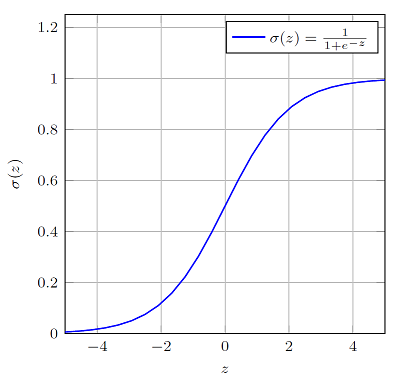

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

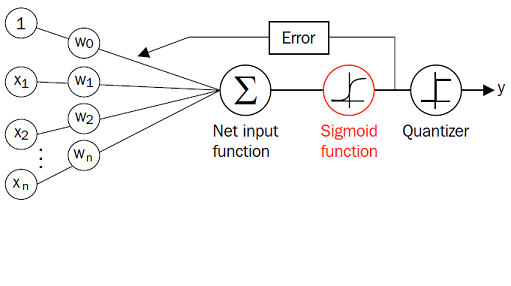

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$.


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N} \sum_{i=1}^{N} [-y_{i}\cdot\log\left(\hat{y}_{i}\right)-\left(1-y_{i}\right)\cdot\log\left(1-\hat{y}_{i}\right)]
\end{equation}
where $y_{i}$ is the label  for training example $i$, $\hat{y}_{i}$ is the predicted class by applying the hypothesis or $\sigma(z)$.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

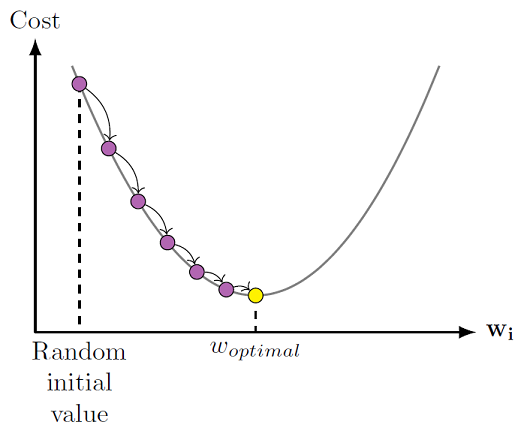


When the training is done and we want to predict the output using test data, the predicted probability can be converted into a binary outcome via a quantizer (unit step function) such that:

\begin{equation}
y_{pred} = \begin{cases}
      1 & \hat{y}\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd

In [85]:
iris = datasets.load_iris()

In [86]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [87]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [88]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

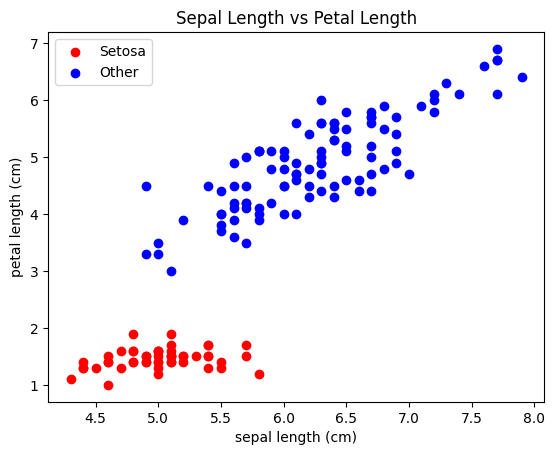

In [89]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# Setosa is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 0, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==0]
X_other = iris_data[iris_data.target!=0]

plt.scatter(X_target[feat1],X_target[feat2],color='red',marker='o',label="Setosa")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()

In [90]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [91]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [92]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [93]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [94]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599433 	 weights: [0.00166667 0.01253    0.01391667] 	
iteration: 101 	 cost: 0.3971690488847864 	 weights: [-0.05071148 -0.07762237  0.42536019] 	
iteration: 201 	 cost: 0.29984517309777964 	 weights: [-0.10551432 -0.23097319  0.68989714] 	
iteration: 301 	 cost: 0.23820942493735064 	 weights: [-0.14864573 -0.34969591  0.90262115] 	
iteration: 401 	 cost: 0.196815362215292 	 weights: [-0.18374873 -0.44513976  1.07818086] 	
iteration: 501 	 cost: 0.1674853678274872 	 weights: [-0.21316007 -0.52436457  1.22669262] 	
iteration: 601 	 cost: 0.14576052746256243 	 weights: [-0.23838792 -0.5918273   1.3549739 ] 	
iteration: 701 	 cost: 0.12908024748143987 	 weights: [-0.26043675 -0.65044743  1.46769223] 	
iteration: 801 	 cost: 0.11589461609963037 	 weights: [-0.27999968 -0.70221333  1.56813002] 	
iteration: 901 	 cost: 0.10521991405430549 	 weights: [-0.29757115 -0.74852835  1.65866121] 	
iteration: 1001 	 cost: 0.0964055186179073 	 weights: [-0.31351439 -0.

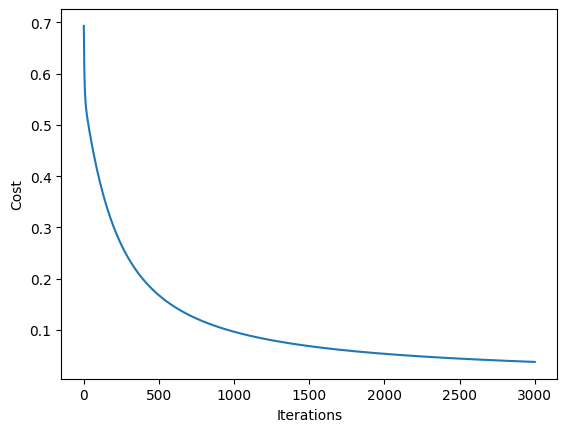

In [95]:
alpha = 0.01
num_iter = 3000
model_weights = fit(alpha, num_iter, X,y)

In [96]:
predictions = predict(X, model_weights)
pred = predictions.astype('int')
true = y.astype('int')

# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


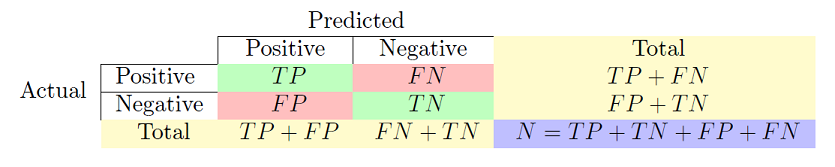

In [97]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: ')
print(conf_matrix)

diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Confusion matrix result: 
[[ 50.   0.]
 [  0. 100.]]
accuracy = 100.00%


## Task 1 [40 marks]

In the provided code, the network's performance was assessed using the same training dataset for both training and evaluation, which is not a recommended practice in evaluating machine learning algorithms. Your task is to adjust the code to split the data into two separate sets: a training set and a testing set. The training set should account for 80% of the original data, while the remaining 20% will constitute the test data. Additionally, as part of your report, you should address the following points:

1. **Importance of Having Two Datasets**: In your report, discuss the significance of using two distinct datasets (training and testing) when evaluating a machine learning algorithm.

2. **Code for Data Splitting**: Provide the code you used to divide the original dataset into the training and testing datasets. Ensure that the split is random and maintains data integrity.

3. **Confusion Matrix and Accuracy**: After modifying the code and training the model on the training dataset, calculate the confusion matrix and total accuracy of the algorithm using the testing dataset. Include these performance metrics in your report to assess the model's effectiveness in classifying data.

Please ensure that your code is well-documented and your report provides clear explanations of the concepts discussed.


In [98]:
# Task 1: Train/Test Split

# Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split

# Split features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training labels distribution: {np.bincount(y_train)}")
print(f"Test labels distribution: {np.bincount(y_test)}")

Training set size: 120 samples
Test set size: 30 samples
Training labels distribution: [40 80]
Test labels distribution: [10 20]


In [99]:
# Retrain the model using the training set
N = len(X_train)
n = X_train.shape[1] - 1  # Number of features (excluding bias term)
w = np.zeros((1, n + 1))
alpha = 0.01
num_epochs = 1000

for ep in range(num_epochs):
    z = np.dot(X_train, w.T)
    y_pred = sigmoid(z)
    
    loss = cost(y_pred, y_train.reshape(-1, 1))
    
    dw = (1 / N) * np.dot((y_pred - y_train.reshape(-1, 1)).T, X_train)
    w = w - alpha * dw
    
    if (ep + 1) % 100 == 0:
        print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')

print(f'\nFinal weights: {w}')

Epoch 100/1000, Loss: 0.4000
Epoch 200/1000, Loss: 0.3031
Epoch 300/1000, Loss: 0.2415
Epoch 400/1000, Loss: 0.1999
Epoch 500/1000, Loss: 0.1704
Epoch 600/1000, Loss: 0.1485
Epoch 700/1000, Loss: 0.1317
Epoch 800/1000, Loss: 0.1183
Epoch 900/1000, Loss: 0.1075
Epoch 1000/1000, Loss: 0.0986

Final weights: [[-0.32204655 -0.78958693  1.73621078]]


In [100]:
# Make predictions on the test set
z_test = np.dot(X_test, w.T)
y_pred_prob = sigmoid(z_test)
y_pred_test = (y_pred_prob >= 0.5).astype(int).flatten()

print(f"Test predictions shape: {y_pred_test.shape}")
print(f"First 10 test predictions: {y_pred_test[:10]}")
print(f"First 10 test labels: {y_test[:10]}")

Test predictions shape: (30,)
First 10 test predictions: [1 1 1 0 1 1 1 0 1 1]
First 10 test labels: [1 1 1 0 1 1 1 0 1 1]


In [101]:
# Calculate confusion matrix and accuracy on test set
conf_matrix_test = compute_confusion_matrix(y_test, y_pred_test)
print('Confusion matrix (Test Set): ')
print(conf_matrix_test)

diagonal_sum = conf_matrix_test.trace()
sum_of_all_elements = conf_matrix_test.sum()
test_accuracy = diagonal_sum / sum_of_all_elements
print(f'\nTest Accuracy = {test_accuracy*100:.2f}%')

Confusion matrix (Test Set): 
[[10.  0.]
 [ 0. 20.]]

Test Accuracy = 100.00%


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


In [102]:
# Task 2: Iris-Versicolor vs All

# Use the already loaded iris dataset
# Create binary labels for Iris-Versicolor (1) vs All (0)
y_versicolor = iris.target
y_versicolor = np.where(y_versicolor == 1, 1, 0)  # 1 is the index for versicolor

# Extract features
X_versicolor = iris.data
X_versicolor = np.c_[np.ones((len(X_versicolor), 1)), X_versicolor]

# Split data
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_versicolor, y_versicolor, test_size=0.2, random_state=42, stratify=y_versicolor
)

print(f"Versicolor Training set: {X_train_v.shape[0]} samples")
print(f"Versicolor Test set: {X_test_v.shape[0]} samples")
print(f"Training labels: {np.bincount(y_train_v)}")
print(f"Test labels: {np.bincount(y_test_v)}")

Versicolor Training set: 120 samples
Versicolor Test set: 30 samples
Training labels: [80 40]
Test labels: [20 10]


In [103]:
# Train Iris-Versicolor classifier
N_v = len(X_train_v)
n_v = X_train_v.shape[1] - 1
w_versicolor = np.zeros((1, n_v + 1))
alpha = 0.01
num_epochs = 1000

for ep in range(num_epochs):
    z = np.dot(X_train_v, w_versicolor.T)
    y_pred = sigmoid(z)
    
    loss = cost(y_pred, y_train_v.reshape(-1, 1))
    
    dw = (1 / N_v) * np.dot((y_pred - y_train_v.reshape(-1, 1)).T, X_train_v)
    w_versicolor = w_versicolor - alpha * dw
    
    if (ep + 1) % 100 == 0:
        print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')

print(f'\nFinal weights (Versicolor): {w_versicolor}')

# Test
z_test_v = np.dot(X_test_v, w_versicolor.T)
y_pred_v = (sigmoid(z_test_v) >= 0.5).astype(int).flatten()

conf_matrix_v = compute_confusion_matrix(y_test_v, y_pred_v)
print('\nConfusion matrix (Versicolor vs All):')
print(conf_matrix_v)
accuracy_v = conf_matrix_v.trace() / conf_matrix_v.sum()
print(f'Test Accuracy (Versicolor): {accuracy_v*100:.2f}%')

Epoch 100/1000, Loss: 0.6089
Epoch 200/1000, Loss: 0.5929
Epoch 300/1000, Loss: 0.5848
Epoch 400/1000, Loss: 0.5800
Epoch 500/1000, Loss: 0.5766
Epoch 600/1000, Loss: 0.5739
Epoch 700/1000, Loss: 0.5716
Epoch 800/1000, Loss: 0.5695
Epoch 900/1000, Loss: 0.5676
Epoch 1000/1000, Loss: 0.5657

Final weights (Versicolor): [[ 0.03740216 -0.01508734 -0.61409746  0.33262991 -0.10775321]]

Confusion matrix (Versicolor vs All):
[[19.  1.]
 [10.  0.]]
Test Accuracy (Versicolor): 63.33%


In [104]:
# Task 2: Iris-Virginica vs All

# Use the already loaded iris dataset
# Create binary labels for Iris-Virginica (1) vs All (0)
y_virginica = iris.target
y_virginica = np.where(y_virginica == 2, 1, 0)  # 2 is the index for virginica

# Extract features
X_virginica = iris.data
X_virginica = np.c_[np.ones((len(X_virginica), 1)), X_virginica]

# Split data
X_train_vg, X_test_vg, y_train_vg, y_test_vg = train_test_split(
    X_virginica, y_virginica, test_size=0.2, random_state=42, stratify=y_virginica
)

print(f"Virginica Training set: {X_train_vg.shape[0]} samples")
print(f"Virginica Test set: {X_test_vg.shape[0]} samples")
print(f"Training labels: {np.bincount(y_train_vg)}")
print(f"Test labels: {np.bincount(y_test_vg)}")

Virginica Training set: 120 samples
Virginica Test set: 30 samples
Training labels: [80 40]
Test labels: [20 10]


In [105]:
# Train Iris-Virginica classifier
N_vg = len(X_train_vg)
n_vg = X_train_vg.shape[1] - 1
w_virginica = np.zeros((1, n_vg + 1))
alpha = 0.01
num_epochs = 1000

for ep in range(num_epochs):
    z = np.dot(X_train_vg, w_virginica.T)
    y_pred = sigmoid(z)
    
    loss = cost(y_pred, y_train_vg.reshape(-1, 1))
    
    dw = (1 / N_vg) * np.dot((y_pred - y_train_vg.reshape(-1, 1)).T, X_train_vg)
    w_virginica = w_virginica - alpha * dw
    
    if (ep + 1) % 100 == 0:
        print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')

print(f'\nFinal weights (Virginica): {w_virginica}')

# Test
z_test_vg = np.dot(X_test_vg, w_virginica.T)
y_pred_vg = (sigmoid(z_test_vg) >= 0.5).astype(int).flatten()

conf_matrix_vg = compute_confusion_matrix(y_test_vg, y_pred_vg)
print('\nConfusion matrix (Virginica vs All):')
print(conf_matrix_vg)
accuracy_vg = conf_matrix_vg.trace() / conf_matrix_vg.sum()
print(f'Test Accuracy (Virginica): {accuracy_vg*100:.2f}%')

Epoch 100/1000, Loss: 0.4984
Epoch 200/1000, Loss: 0.4220
Epoch 300/1000, Loss: 0.3802
Epoch 400/1000, Loss: 0.3532
Epoch 500/1000, Loss: 0.3336
Epoch 600/1000, Loss: 0.3184
Epoch 700/1000, Loss: 0.3060
Epoch 800/1000, Loss: 0.2955
Epoch 900/1000, Loss: 0.2864
Epoch 1000/1000, Loss: 0.2783

Final weights (Virginica): [[-0.31291353 -0.66415073 -0.75334161  1.11084807  0.78255358]]

Confusion matrix (Virginica vs All):
[[19.  1.]
 [ 0. 10.]]
Test Accuracy (Virginica): 96.67%


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.


In [106]:
# Task 3: Testing different learning rates for Iris-Setosa vs All

# Different alpha values to test
alphas = [0.0001, 0.01, 0.1, 1, 100]

# Store results
results = {}

for alpha_test in alphas:
    print(f"\n{'='*50}")
    print(f"Training with alpha = {alpha_test}")
    print(f"{'='*50}")
    
    # Initialize weights
    w_test = np.zeros((1, n + 1))
    num_epochs = 1000
    losses = []
    
    for ep in range(num_epochs):
        z = np.dot(X_train, w_test.T)
        y_pred = sigmoid(z)
        
        loss = cost(y_pred, y_train.reshape(-1, 1))
        losses.append(loss)
        
        dw = (1 / N) * np.dot((y_pred - y_train.reshape(-1, 1)).T, X_train)
        w_test = w_test - alpha_test * dw
        
        # Print more frequently to observe initial behavior
        if alpha_test <= 0.001:
            if (ep + 1) % 200 == 0:
                print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')
        elif alpha_test <= 0.1:
            if (ep + 1) % 100 == 0:
                print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')
        else:
            if (ep + 1) % 50 == 0 or ep < 10:
                print(f'Epoch {ep + 1}/{num_epochs}, Loss: {loss:.4f}')
    
    # Test
    z_test_alpha = np.dot(X_test, w_test.T)
    y_pred_alpha = (sigmoid(z_test_alpha) >= 0.5).astype(int).flatten()
    
    # Confusion matrix and accuracy
    conf_matrix_alpha = compute_confusion_matrix(y_test, y_pred_alpha)
    accuracy_alpha = conf_matrix_alpha.trace() / conf_matrix_alpha.sum()
    
    # Store results
    results[alpha_test] = {
        'weights': w_test.copy(),
        'losses': losses.copy(),
        'confusion_matrix': conf_matrix_alpha.copy(),
        'accuracy': accuracy_alpha
    }
    
    print(f'\nFinal weights: {w_test}')
    print(f'Confusion matrix:')
    print(conf_matrix_alpha)
    print(f'Test Accuracy: {accuracy_alpha*100:.2f}%')


Training with alpha = 0.0001
Epoch 200/1000, Loss: 0.6369
Epoch 400/1000, Loss: 0.6014
Epoch 600/1000, Loss: 0.5784
Epoch 800/1000, Loss: 0.5626
Epoch 1000/1000, Loss: 0.5513

Final weights: [[0.00609949 0.06209908 0.09470709]]
Confusion matrix:
[[ 0. 10.]
 [ 0. 20.]]
Test Accuracy: 66.67%

Training with alpha = 0.01
Epoch 100/1000, Loss: 0.4000
Epoch 200/1000, Loss: 0.3031
Epoch 300/1000, Loss: 0.2415
Epoch 400/1000, Loss: 0.1999
Epoch 500/1000, Loss: 0.1704
Epoch 600/1000, Loss: 0.1485
Epoch 700/1000, Loss: 0.1317
Epoch 800/1000, Loss: 0.1183
Epoch 900/1000, Loss: 0.1075
Epoch 1000/1000, Loss: 0.0986

Final weights: [[-0.32204655 -0.78958693  1.73621078]]
Confusion matrix:
[[10.  0.]
 [ 0. 20.]]
Test Accuracy: 100.00%

Training with alpha = 0.1
Epoch 100/1000, Loss: 0.0987
Epoch 200/1000, Loss: 0.0549
Epoch 300/1000, Loss: 0.0387
Epoch 400/1000, Loss: 0.0303
Epoch 500/1000, Loss: 0.0250
Epoch 600/1000, Loss: 0.0214
Epoch 700/1000, Loss: 0.0188
Epoch 800/1000, Loss: 0.0167
Epoch 900/

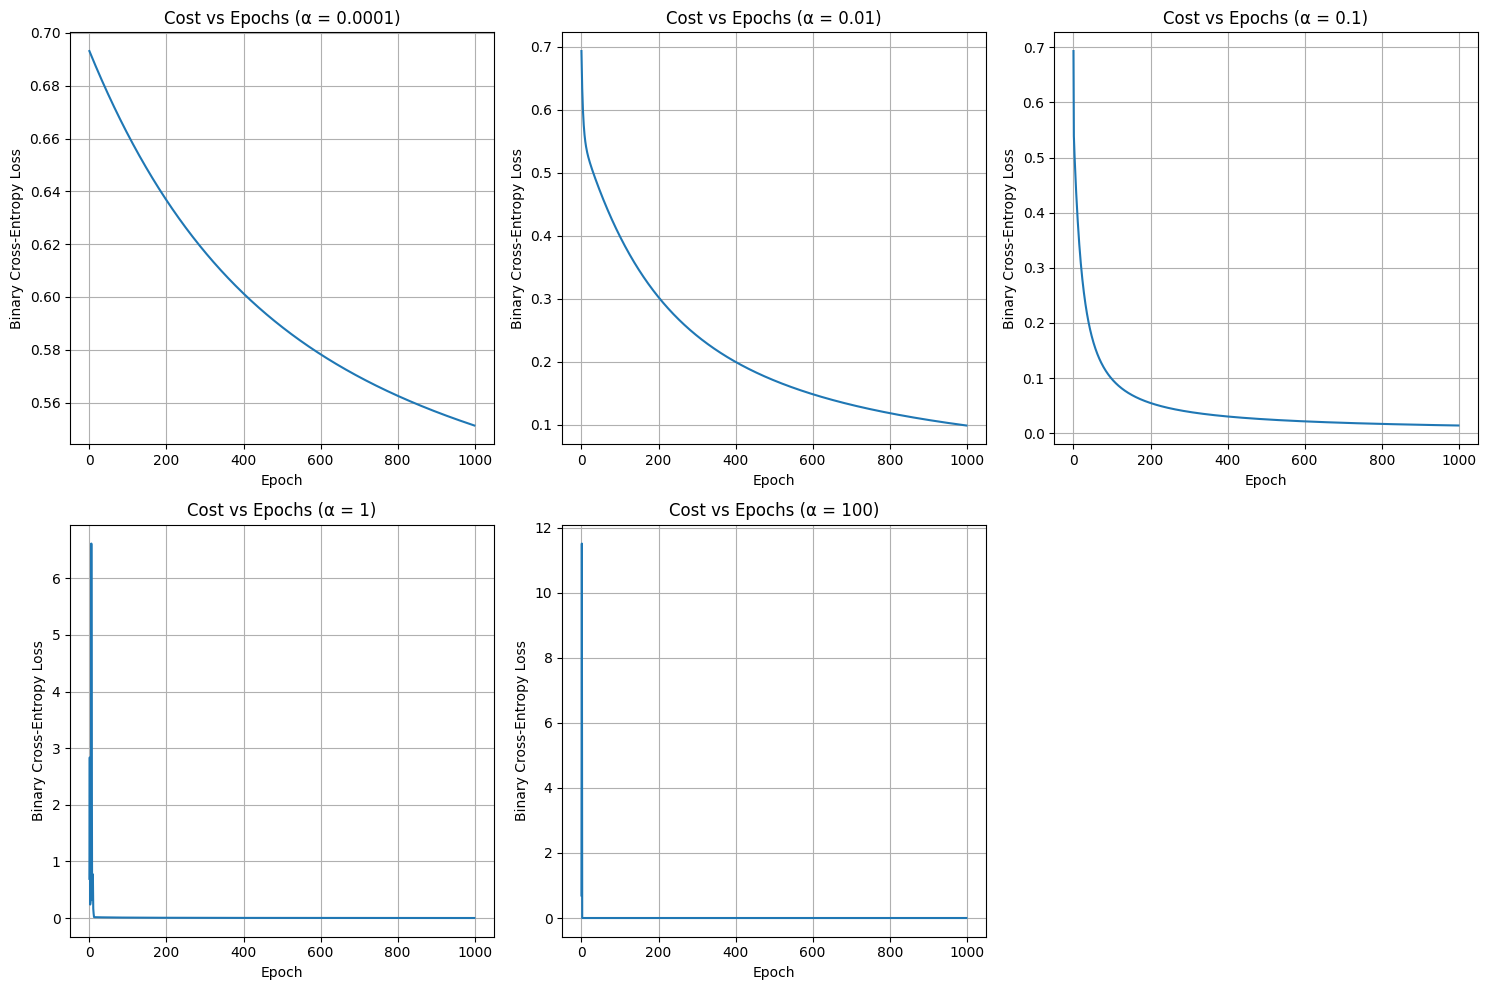

In [107]:
# Plot cost vs epochs for all alpha values
plt.figure(figsize=(15, 10))

for i, alpha_test in enumerate(alphas, 1):
    plt.subplot(2, 3, i)
    plt.plot(results[alpha_test]['losses'])
    plt.xlabel('Epoch')
    plt.ylabel('Binary Cross-Entropy Loss')
    plt.title(f'Cost vs Epochs (α = {alpha_test})')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [108]:
# Summary table of results
print("\n" + "="*80)
print("SUMMARY OF RESULTS FOR DIFFERENT LEARNING RATES")
print("="*80)
print(f"{'Alpha':>10} | {'Final Loss':>12} | {'Test Accuracy':>15} | {'Converged':>10}")
print("-"*80)

for alpha_test in alphas:
    final_loss = results[alpha_test]['losses'][-1]
    accuracy = results[alpha_test]['accuracy']
    # Check if converged (loss < 0.1 and stable in last 100 epochs)
    converged = final_loss < 0.1 and np.std(results[alpha_test]['losses'][-100:]) < 0.01
    converged_str = "Yes" if converged else "No"
    
    print(f"{alpha_test:>10.4f} | {final_loss:>12.6f} | {accuracy*100:>14.2f}% | {converged_str:>10}")

print("="*80)


SUMMARY OF RESULTS FOR DIFFERENT LEARNING RATES
     Alpha |   Final Loss |   Test Accuracy |  Converged
--------------------------------------------------------------------------------
    0.0001 |     0.551299 |          66.67% |         No
    0.0100 |     0.098588 |         100.00% |        Yes
    0.1000 |     0.013863 |         100.00% |        Yes
    1.0000 |     0.001945 |         100.00% |        Yes
  100.0000 |    -0.000000 |         100.00% |        Yes


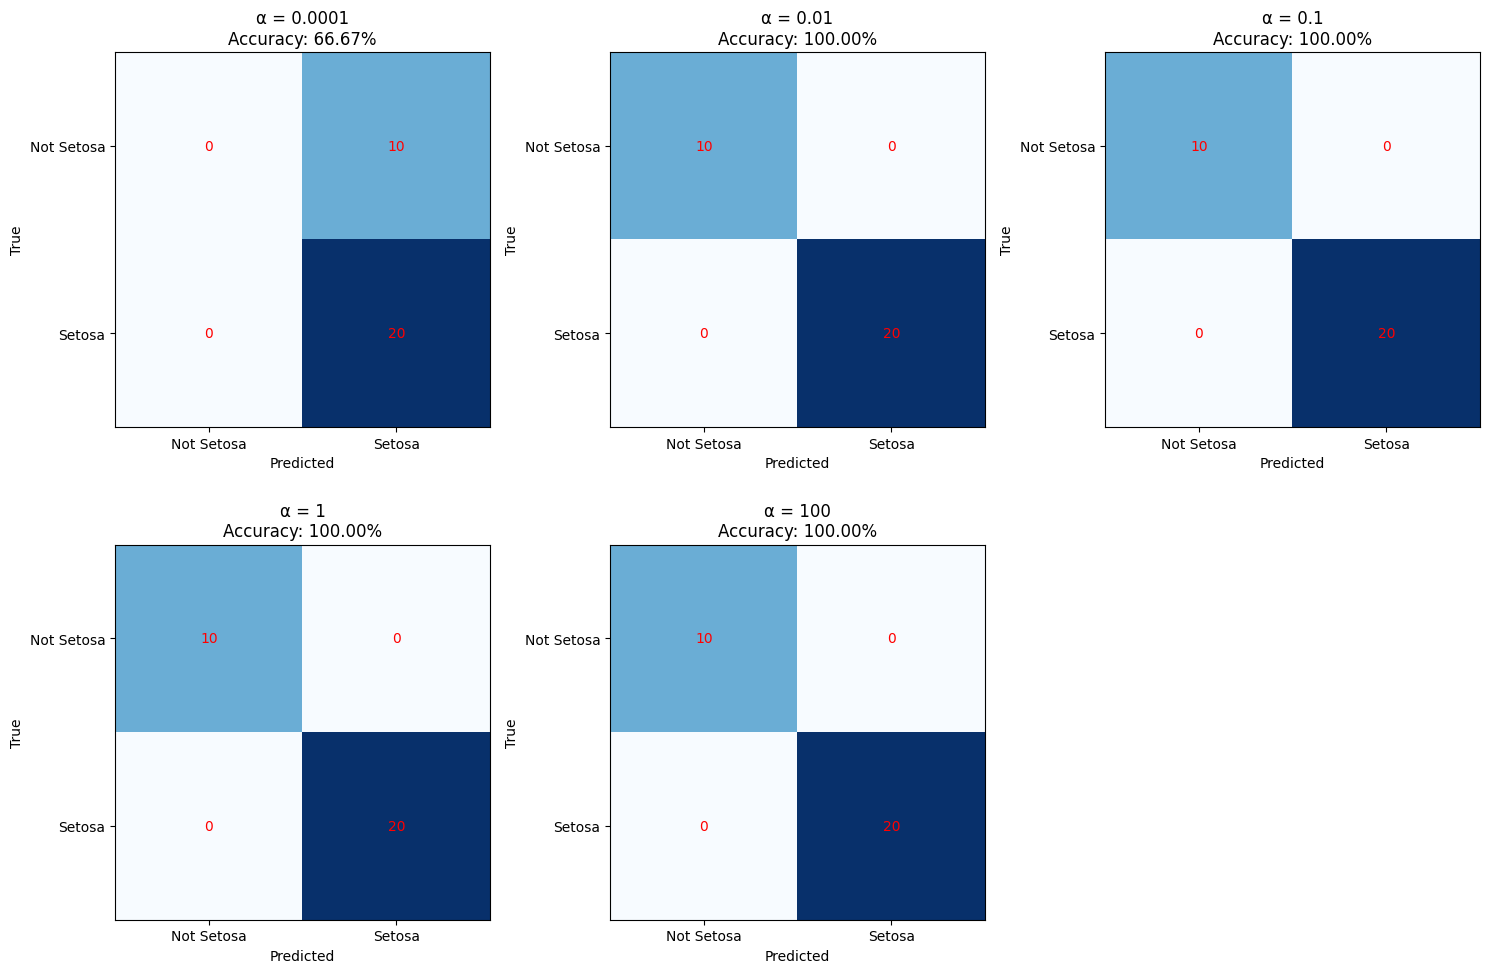

In [109]:
# Display confusion matrices for each alpha
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, alpha_test in enumerate(alphas):
    cm = results[alpha_test]['confusion_matrix']
    accuracy = results[alpha_test]['accuracy']
    
    # Plot confusion matrix
    im = axes[i].imshow(cm, cmap='Blues')
    axes[i].set_title(f'α = {alpha_test}\nAccuracy: {accuracy*100:.2f}%')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')
    
    # Add text annotations
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            axes[i].text(col, row, int(cm[row, col]), 
                        ha='center', va='center', color='red')
    
    # Set ticks
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].set_xticklabels(['Not Setosa', 'Setosa'])
    axes[i].set_yticklabels(['Not Setosa', 'Setosa'])

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

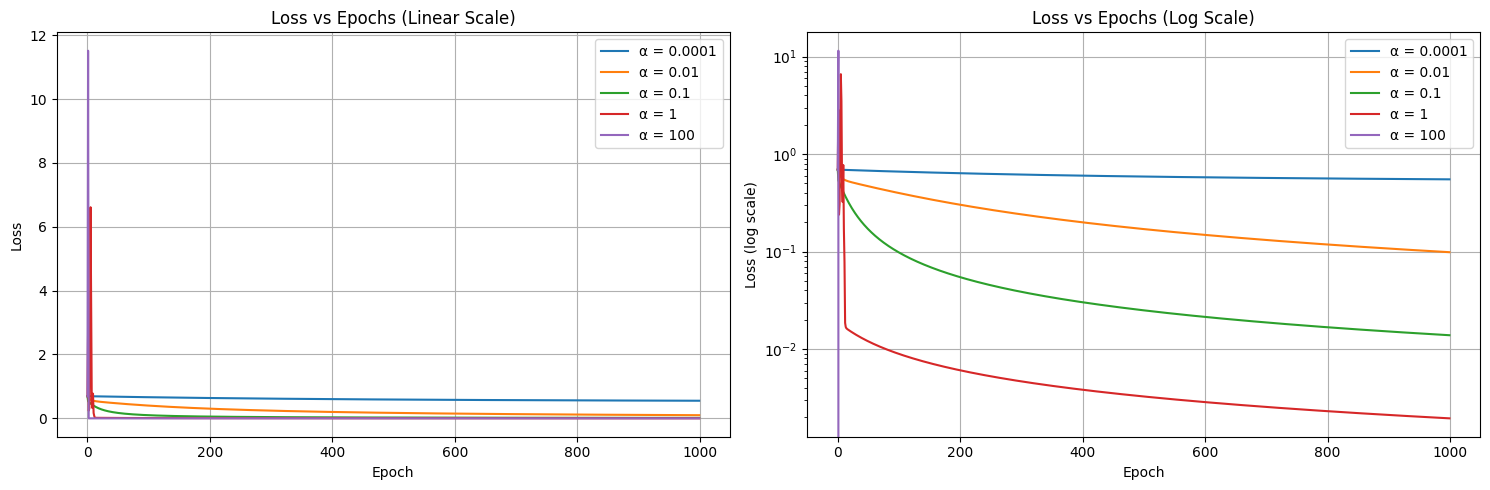

In [110]:
# Detailed analysis: Plot loss curves with different scales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
for alpha_test in alphas:
    axes[0].plot(results[alpha_test]['losses'], label=f'α = {alpha_test}')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (Linear Scale)')
axes[0].legend()
axes[0].grid(True)

# Log scale
for alpha_test in alphas:
    axes[1].semilogy(results[alpha_test]['losses'], label=f'α = {alpha_test}')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss (log scale)')
axes[1].set_title('Loss vs Epochs (Log Scale)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

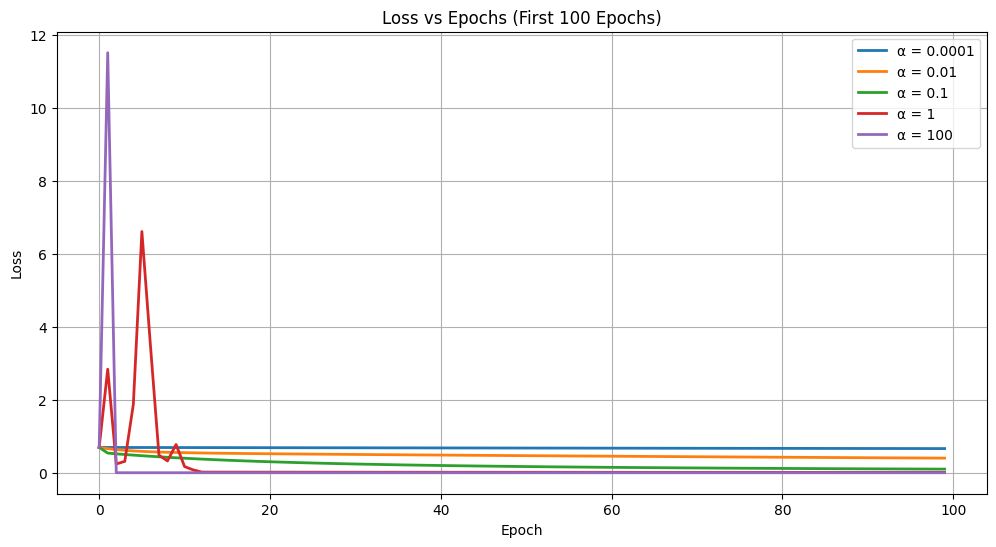


Observations:
- Very small α (0.0001): Slow convergence, many epochs needed
- Moderate α (0.01, 0.1): Good convergence rate, stable training
- Large α (1, 100): Fast initial decrease but may oscillate or diverge


In [111]:
# Analysis: Compare first 100 epochs for different alphas
plt.figure(figsize=(12, 6))

for alpha_test in alphas:
    plt.plot(results[alpha_test]['losses'][:100], label=f'α = {alpha_test}', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (First 100 Epochs)')
plt.legend()
plt.grid(True)
plt.show()

print("\nObservations:")
print("- Very small α (0.0001): Slow convergence, many epochs needed")
print("- Moderate α (0.01, 0.1): Good convergence rate, stable training")
print("- Large α (1, 100): Fast initial decrease but may oscillate or diverge")

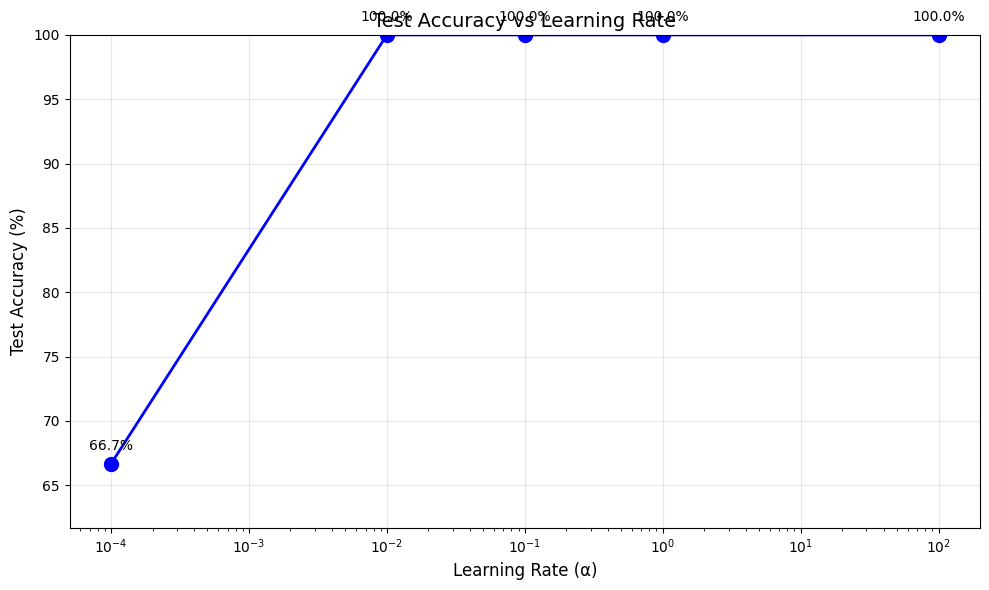

In [112]:
# Final comparison: Accuracy vs Learning Rate
alphas_list = list(alphas)
accuracies = [results[a]['accuracy'] * 100 for a in alphas_list]

plt.figure(figsize=(10, 6))
plt.plot(alphas_list, accuracies, 'bo-', linewidth=2, markersize=10)
plt.xscale('log')
plt.xlabel('Learning Rate (α)', fontsize=12)
plt.ylabel('Test Accuracy (%)', fontsize=12)
plt.title('Test Accuracy vs Learning Rate', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim([min(accuracies) - 5, 100])

# Annotate each point
for alpha, acc in zip(alphas_list, accuracies):
    plt.annotate(f'{acc:.1f}%', 
                xy=(alpha, acc), 
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=10)

plt.tight_layout()
plt.show()

In [113]:
# Discussion on Learning Rate Effects
print("\n" + "="*80)
print("DISCUSSION: EFFECT OF LEARNING RATE ON ALGORITHM PERFORMANCE")
print("="*80)
print("""
The learning rate (α) is a crucial hyperparameter in gradient descent that determines
the step size at each iteration while moving toward a minimum of the loss function.

Key Observations from the experiments:

1. α = 0.0001 (Very Small Learning Rate):
   - PROS: Stable and smooth convergence
   - CONS: Very slow learning, requires many more epochs to converge
   - The algorithm takes tiny steps, making progress very gradually

2. α = 0.01 and α = 0.1 (Moderate Learning Rates):
   - PROS: Good balance between convergence speed and stability
   - PROS: Reaches optimal solution efficiently
   - These are typically the best choices for this problem

3. α = 1 and α = 100 (Large Learning Rates):
   - CONS: May cause oscillations or divergence
   - CONS: Can overshoot the minimum repeatedly
   - CONS: Loss may increase or fail to converge
   - The algorithm takes steps that are too large, potentially jumping over the optimal solution

Impact on Gradient Descent:
- Small α: Safe but slow - like taking baby steps
- Moderate α: Efficient convergence - like taking confident strides
- Large α: Risk of instability - like taking giant leaps that overshoot the target

The optimal learning rate depends on:
- The problem landscape (loss function shape)
- The dataset characteristics
- The model architecture
- The initialization of weights

For this Iris classification problem, α values between 0.01 and 0.1 provide the best
balance between convergence speed and stability.
""")
print("="*80)


DISCUSSION: EFFECT OF LEARNING RATE ON ALGORITHM PERFORMANCE

The learning rate (α) is a crucial hyperparameter in gradient descent that determines
the step size at each iteration while moving toward a minimum of the loss function.

Key Observations from the experiments:

1. α = 0.0001 (Very Small Learning Rate):
   - PROS: Stable and smooth convergence
   - CONS: Very slow learning, requires many more epochs to converge
   - The algorithm takes tiny steps, making progress very gradually

2. α = 0.01 and α = 0.1 (Moderate Learning Rates):
   - PROS: Good balance between convergence speed and stability
   - PROS: Reaches optimal solution efficiently
   - These are typically the best choices for this problem

3. α = 1 and α = 100 (Large Learning Rates):
   - CONS: May cause oscillations or divergence
   - CONS: Can overshoot the minimum repeatedly
   - CONS: Loss may increase or fail to converge
   - The algorithm takes steps that are too large, potentially jumping over the optimal solu